In [50]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [51]:
# Open CSV file
with open('dataset\Restaurant_Sales_Data-Cleaned_Data.csv', newline='') as csvfile:
    # Create CSV reader object
    csv_reader = csv.reader(csvfile, delimiter=',')
    
    # Skip header row
    next(csv_reader)
    
    # Initialize empty list
    rows = []
    
    # Iterate over each row and append data to list
    for row in csv_reader:
        rows.append(row)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=["Dates", "Net Sales", "% Noodles", "Weekdays"])

# Print the DataFrame
# print(df)

In [52]:
# Convert columns to correct format
df['Dates'] = pd.to_datetime(df['Dates'])
df['Net Sales'] = df['Net Sales'].astype(float)
df['% Noodles'] = df['% Noodles'].astype(float)

# Filter data for Event_df and nonEvent_df
Event_df = df[(df['Dates'] >= '2023-07-16') & (df['Dates'] <= '2023-08-31')]
nonEvent_df = df[(df['Dates'] < '2023-07-16') | (df['Dates'] > '2023-08-31')]

# Print the filtered DataFrame
#print(nonEvent_df)
#print(Event_df)

## Data Analysis

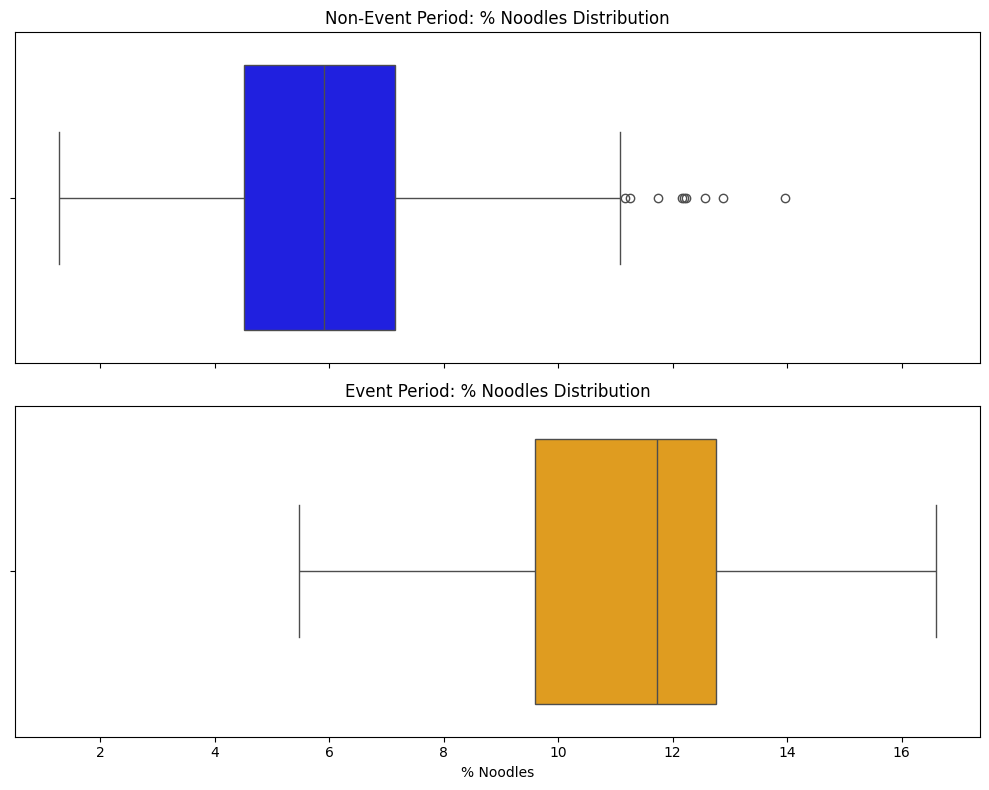

In [53]:
# Set up figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot box plot for '% Noodles' in nonEvent_df
sns.boxplot(x=nonEvent_df['% Noodles'], ax=axes[0], color='blue')
axes[0].set_title('Non-Event Period: % Noodles Distribution')

# Plot box plot for '% Noodles' in Event_df
sns.boxplot(x=Event_df['% Noodles'], ax=axes[1], color='orange')
axes[1].set_title('Event Period: % Noodles Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

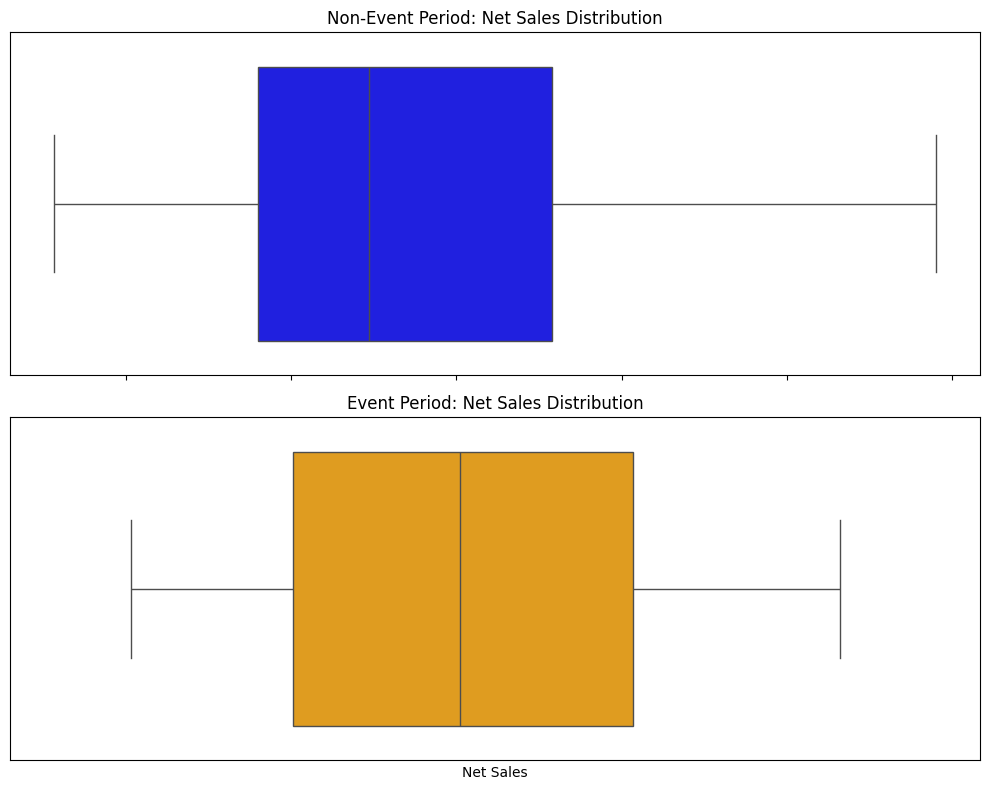

In [54]:
# Set up figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot box plot for 'Net Sales' in nonEvent_df
sns.boxplot(x=nonEvent_df['Net Sales'], ax=axes[0], color='blue')
axes[0].set_title('Non-Event Period: Net Sales Distribution')
axes[0].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot box plot for 'Net Sales' in Event_df
sns.boxplot(x=Event_df['Net Sales'], ax=axes[1], color='orange')
axes[1].set_title('Event Period: Net Sales Distribution')
axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Remove ticks and labels from x-axis for the bottom subplot
axes[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Adjust layout
plt.tight_layout()
plt.show()